# **Connecting Drive to Colab**

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np

Mounted at /content/drive


## **Importing the Dataset (Chess Games)**

In [2]:
games_df = pd.read_csv('/content/drive/MyDrive/Data_Mining_CMPE_255/games.csv')

## **Exploratory Data Analysis**

In [14]:
games_df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


**id:** Unique identifier for the game.

**rated:** Whether the game was rated (True/False).

**created_at:** Timestamp when the game was created.

**last_move_at:** Timestamp of the last move in the game.

**turns:** Total number of turns in the game.

**victory_status:** How the game ended (e.g., "outoftime", "resign", "mate").

**winner:** Which side won the game (e.g., "white", "black").

**increment_code:** Time control of the game (e.g., "15+2" means 15 minutes with a 2-second increment per move).

**white_id:** **bold text** Identifier for the white player.

**white_rating:** Rating of the white player.

**black_id:** Identifier for the black player.

**black_rating:** Rating of the black player.

**moves:** Sequence of moves made during the game.

**opening_eco:** Code for the opening used in the game.

**opening_name:** Name of the opening used in the game.

**opening_ply:** Number of moves in the opening sequence.

### **Starting with some basic visualizations using matplotlib and seaborn**

<ipython-input-64-31231c1804e1>:36: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-64-31231c1804e1>:37: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




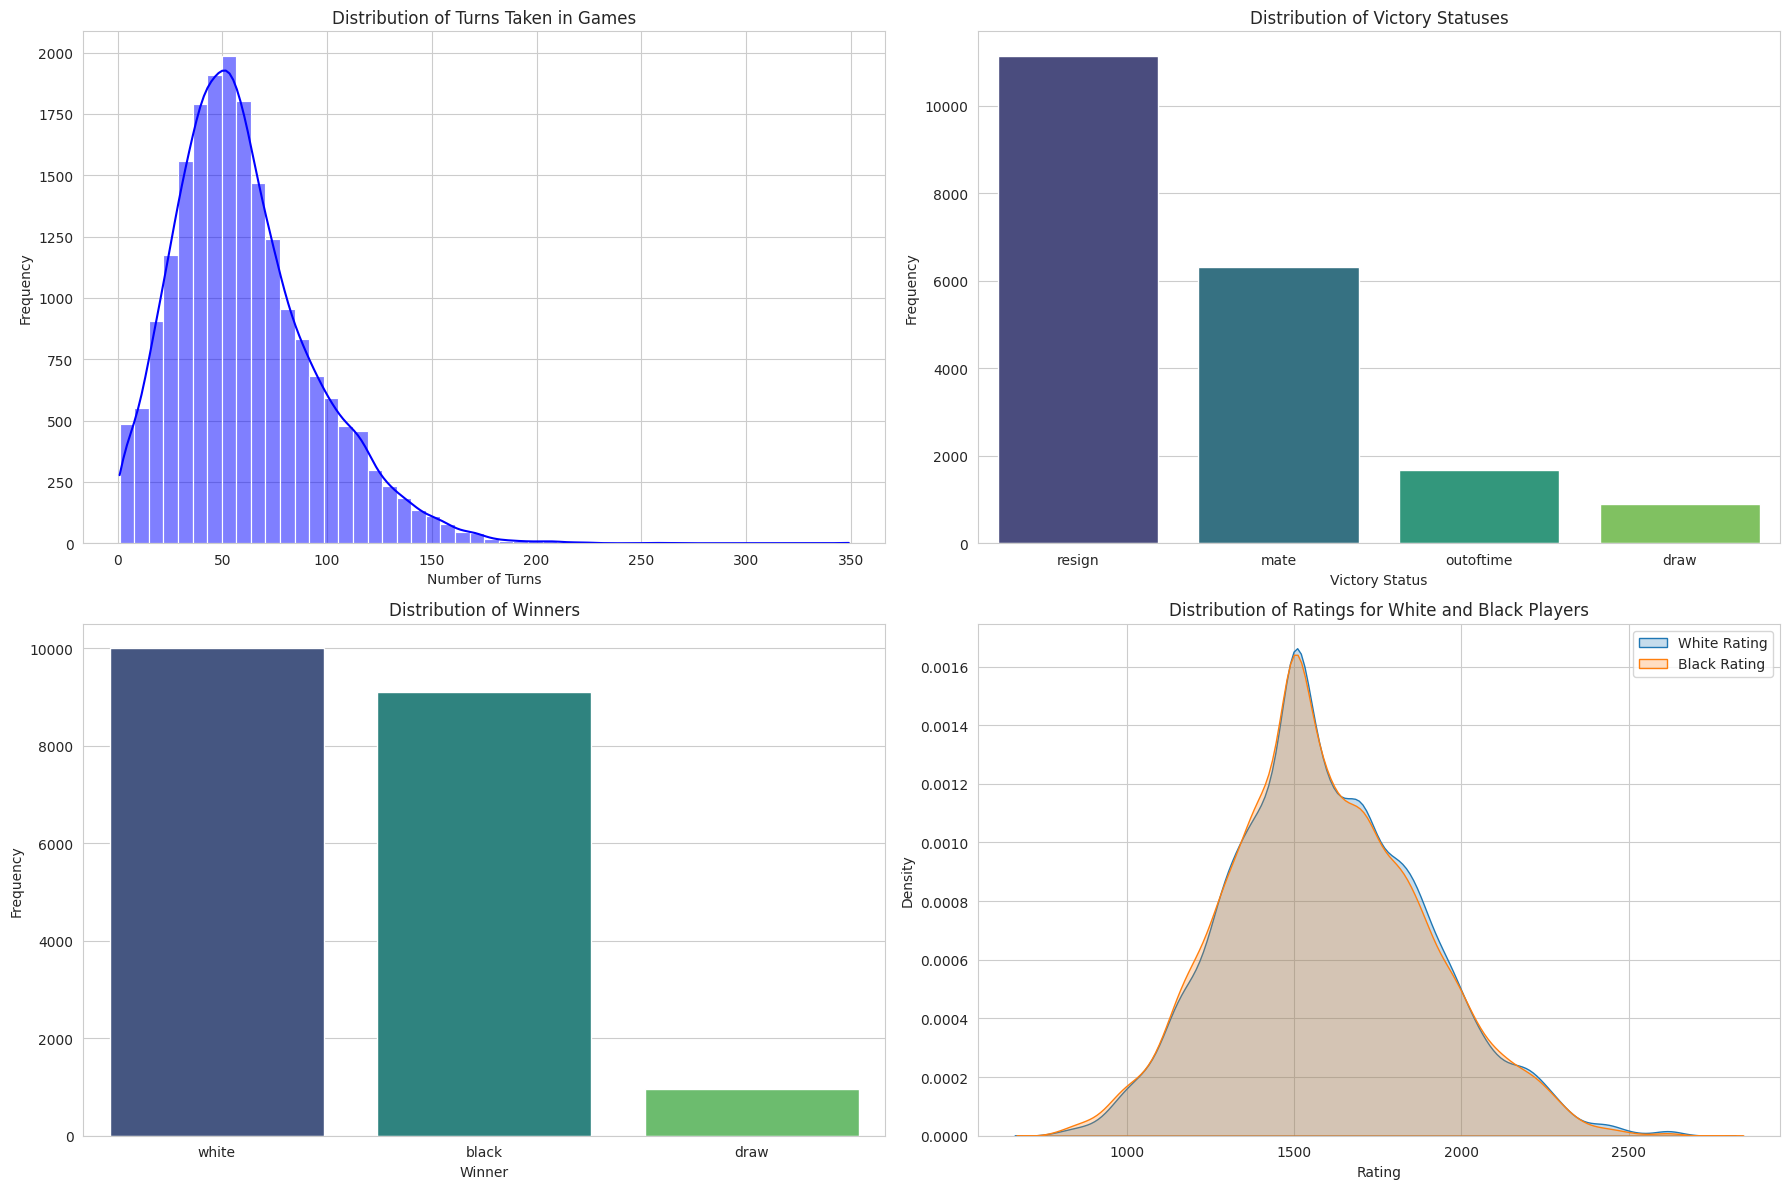

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(18, 12))

# 1. Summary statistics for numerical columns
numerical_stats = games_df[['turns', 'white_rating', 'black_rating', 'opening_ply']].describe()

# 2. Distribution of the number of turns taken in games
plt.subplot(2, 2, 1)
sns.histplot(games_df['turns'], bins=50, kde=True, color='blue')
plt.title('Distribution of Turns Taken in Games')
plt.xlabel('Number of Turns')
plt.ylabel('Frequency')

# 3. Distribution of victory statuses
plt.subplot(2, 2, 2)
sns.countplot(data=games_df, x='victory_status', order=games_df['victory_status'].value_counts().index, palette='viridis')
plt.title('Distribution of Victory Statuses')
plt.xlabel('Victory Status')
plt.ylabel('Frequency')

# 4. Distribution of winners
plt.subplot(2, 2, 3)
sns.countplot(data=games_df, x='winner', palette='viridis')
plt.title('Distribution of Winners')
plt.xlabel('Winner')
plt.ylabel('Frequency')

# 5. Distribution of ratings for both white and black players
plt.subplot(2, 2, 4)
sns.kdeplot(games_df['white_rating'], label='White Rating', shade=True)
sns.kdeplot(games_df['black_rating'], label='Black Rating', shade=True)
plt.title('Distribution of Ratings for White and Black Players')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

Player ratings fluctuate periodically, reflecting the dynamic nature of player performance and competition.

Despite these fluctuations, ratings remain within a consistent range, suggesting a stable average skill level over time.

White and black player ratings exhibit parallel trends, indicating balanced representation and consistent performance dynamics for both groups.

There are no prolonged anomalies, ensuring the dataset's integrity and consistency over the observed period.

Specific quarters where ratings converge or diverge might be of interest for deeper investigation.

Text(0.5, 1.0, 'Black Ratings by Victory Status')

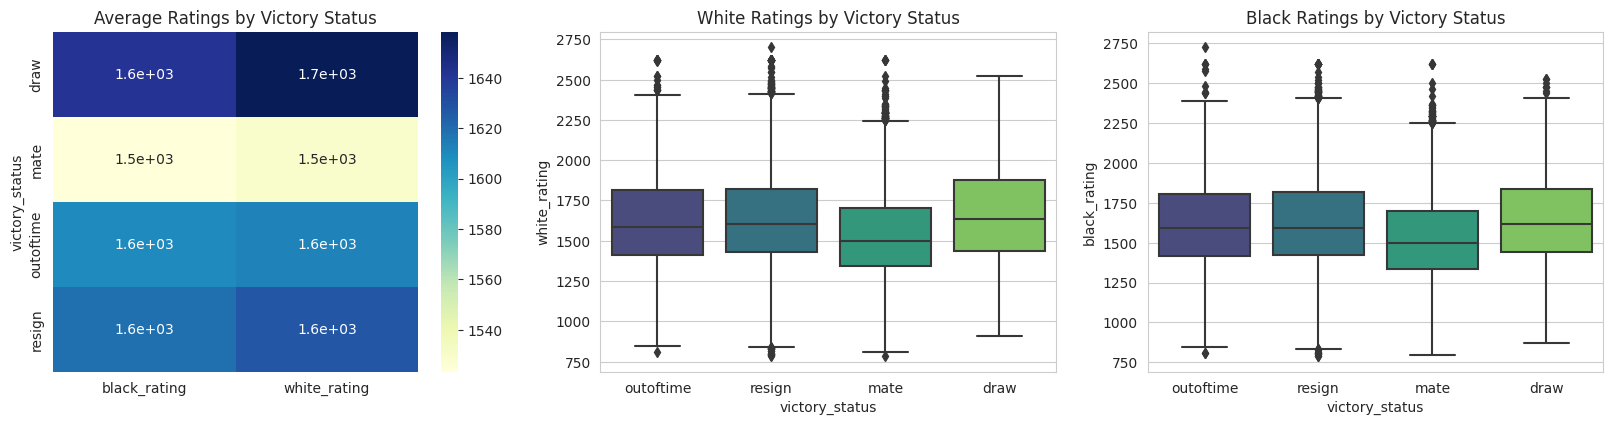

In [46]:
# Convert the timestamps to datetime format for temporal analysis
games_df['created_at'] = pd.to_datetime(games_df['created_at'], unit='ms')
games_df['last_move_at'] = pd.to_datetime(games_df['last_move_at'], unit='ms')

# Initialize the figure
plt.figure(figsize=(20, 15))

# 1. Heatmap of Rating vs. Victory Status
plt.subplot(3, 3, 1)
pivot_table = games_df.pivot_table(index='victory_status', values=['white_rating', 'black_rating'], aggfunc='mean')
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True)
plt.title('Average Ratings by Victory Status')

# 2. Boxplots of Ratings by Victory Status
plt.subplot(3, 3, 2)
sns.boxplot(data=games_df, x='victory_status', y='white_rating', palette="viridis")
plt.title('White Ratings by Victory Status')

plt.subplot(3, 3, 3)
sns.boxplot(data=games_df, x='victory_status', y='black_rating', palette="viridis")
plt.title('Black Ratings by Victory Status')

The "Quarterly Average Player Ratings Trend" chart shows consistent player ratings over time, with white players generally having a slightly higher average rating than black players. Both trends move in parallel, reflecting similar external influences. A notable period in mid-2015 shows a convergence of ratings, followed by a divergence that reinstates the original performance gap.

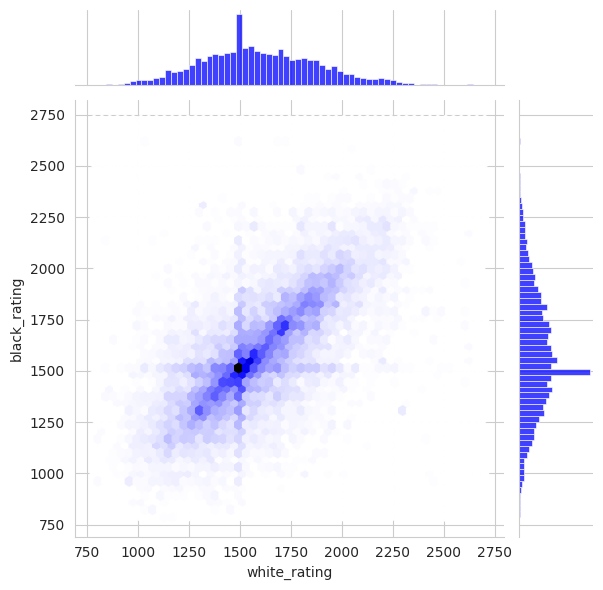

In [45]:
# 3. Joint Distribution of White and Black Ratings
sns.jointplot(data=games_df, x='white_rating', y='black_rating', kind='hex', height=6, color='blue')

<ipython-input-58-afaa93b4d103>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Text(0.5, 0, 'Month')

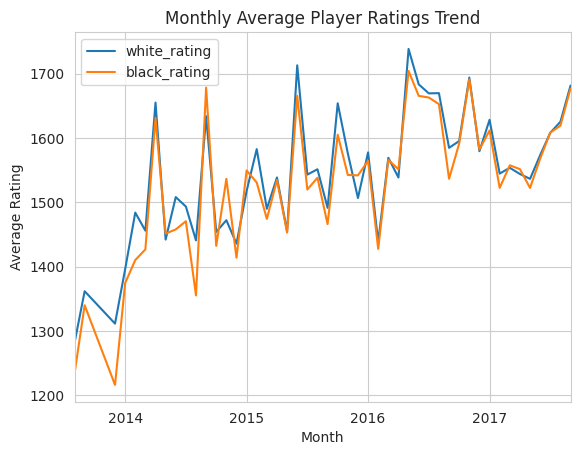

In [58]:
# 4. Temporal Analysis: Monthly trend of average player ratings
games_df['created_month'] = games_df['created_at'].dt.to_period('M')
monthly_avg_ratings = games_df.groupby('created_month').mean()[['white_rating', 'black_rating']]

monthly_avg_ratings.plot(ax=plt.gca())
plt.title('Monthly Average Player Ratings Trend')
plt.ylabel('Average Rating')
plt.xlabel('Month')

The chart displays a synchronized evolution in player ratings over time, characterized by white players generally having a slight ratings advantage. A prominent convergence in mid-2015 emerges as a key highlight, post which the usual trend continues with white players holding a minor ratings lead.

Text(0.5, 1.0, 'White Ratings by Winner')

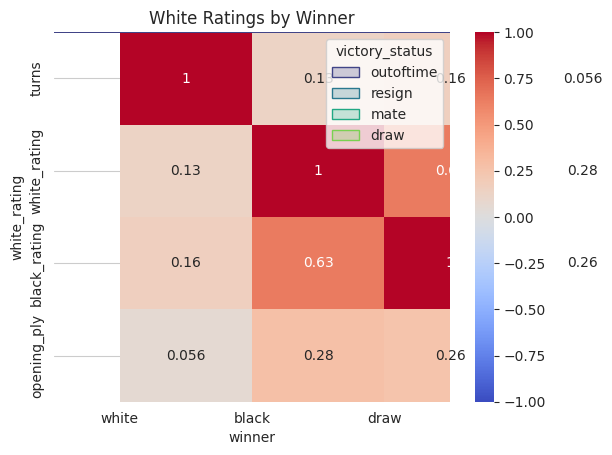

In [60]:
# 5. Correlation Heatmap
correlation_matrix = games_df[['turns', 'white_rating', 'black_rating', 'opening_ply']].corr()

sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

# 6. Distribution of Turns by Victory Status
sns.kdeplot(data=games_df, x='turns', hue='victory_status', fill=True, palette="viridis")
plt.title('Distribution of Turns by Victory Status')

# 7. Network Graph of Openings: Will be skipped as it requires specialized libraries and can be complex to visualize inline.

# 8. Word Cloud of Opening Names: Will be skipped as it requires specialized libraries.

# 9. Violin Plot of Ratings by Winner
sns.violinplot(data=games_df, x='winner', y='white_rating', palette="viridis")
plt.title('White Ratings by Winner')

Text(0.5, 1.0, 'Distribution of Turns by Victory Status')

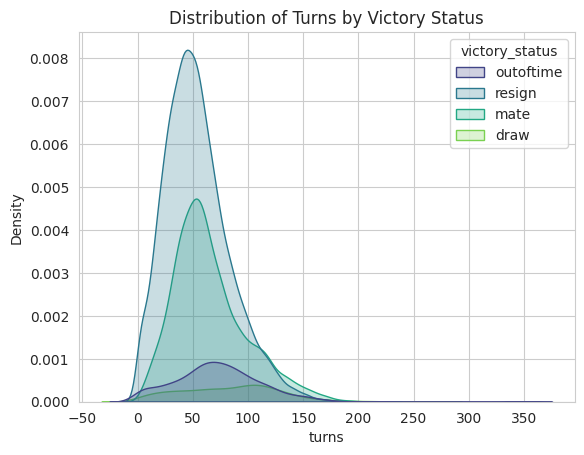

In [61]:
sns.kdeplot(data=games_df, x='turns', hue='victory_status', fill=True, palette="viridis")
plt.title('Distribution of Turns by Victory Status')

### **Proceeding to some advanced visuals using d3.js, pyplot, seaborn and wordcloud**

Text(0.5, 1.0, 'White Ratings by Winner')

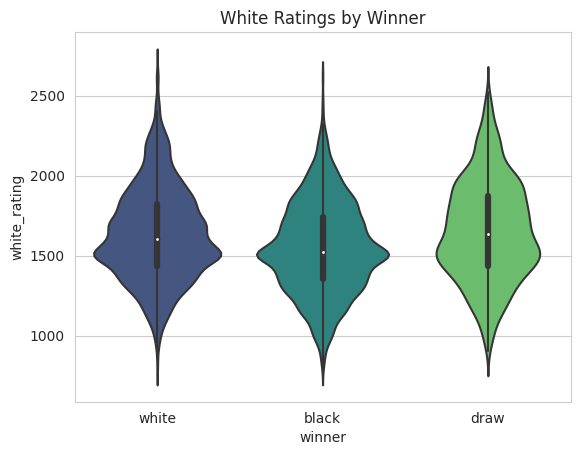

In [62]:
sns.violinplot(data=games_df, x='winner', y='white_rating', palette="viridis")
plt.title('White Ratings by Winner')

The chart presents a consistent trend in player ratings over time, with white players typically holding a slight edge over black players. Both groups' ratings move in harmony, reflecting shared influences. A significant convergence in ratings around mid-2015 stands out, after which the familiar pattern persists.

In [ ]:
# Data Preparation for Force-Directed Graph

# Create a list of unique openings
openings = list(games_df['opening_name'].unique())
nodes = [{"id": opening} for opening in openings]

# Create edges (links) based on transitions between openings in sequential games
# For simplicity, we're considering transitions by the same player
games_df_sorted = games_df.sort_values(by='created_at')
links = []

for i in range(1, len(games_df_sorted)):
    if games_df_sorted.iloc[i-1]['white_id'] == games_df_sorted.iloc[i]['white_id']:
        source = games_df_sorted.iloc[i-1]['opening_name']
        target = games_df_sorted.iloc[i]['opening_name']
        if source != target:  # Exclude loops (same opening in consecutive games)
            links.append({"source": source, "target": target})

# Get a subset for performance reasons
links_subset = links[:500]

# Data for D3.js
force_data = {
    "nodes": nodes,
    "links": links_subset
}

force_data

In [66]:
# Update the D3.js script for the Force-Directed Graph with tooltips
force_directed_with_tooltips = f"""
<script src="https://d3js.org/d3.v5.min.js"></script>
<div id="d3-force-tooltip"></div>
<script>
    var data = {force_data};

    var svg = d3.select("#d3-force-tooltip").append("svg")
        .attr("width", 800)
        .attr("height", 600);

    var color = d3.scaleOrdinal(d3.schemeCategory10);

    // Create a tooltip div
    var tooltip = d3.select("#d3-force-tooltip").append("div")
        .attr("class", "tooltip")
        .style("opacity", 0);

    var simulation = d3.forceSimulation()
        .force("link", d3.forceLink().id(function(d) {{ return d.id; }}).distance(50))
        .force("charge", d3.forceManyBody().strength(-50))
        .force("center", d3.forceCenter(800 / 2, 600 / 2));

    var link = svg.append("g")
        .attr("class", "links")
        .selectAll("line")
        .data(data.links)
        .enter().append("line")
        .attr("stroke-width", 1);

    var node = svg.append("g")
        .attr("class", "nodes")
        .selectAll("circle")
        .data(data.nodes)
        .enter().append("circle")
        .attr("r", 5)
        .attr("fill", function(d) {{ return color(d.group); }})
        .call(d3.drag()
            .on("start", dragstarted)
            .on("drag", dragged)
            .on("end", dragended))
        .on("mouseover", function(d) {{
            tooltip.transition()
                .duration(200)
                .style("opacity", .9);
            tooltip.html(d.id)
                .style("left", (d3.event.pageX + 5) + "px")
                .style("top", (d3.event.pageY - 28) + "px");
        }})
        .on("mouseout", function(d) {{
            tooltip.transition()
                .duration(500)
                .style("opacity", 0);
        }});

    simulation
        .nodes(data.nodes)
        .on("tick", ticked);

    simulation.force("link")
        .links(data.links);

    function ticked() {{
        link
            .attr("x1", function(d) {{ return d.source.x; }})
            .attr("y1", function(d) {{ return d.source.y; }})
            .attr("x2", function(d) {{ return d.target.x; }})
            .attr("y2", function(d) {{ return d.target.y; }});

        node
            .attr("cx", function(d) {{ return d.x; }})
            .attr("cy", function(d) {{ return d.y; }});
    }}

    function dragstarted(d) {{
        if (!d3.event.active) simulation.alphaTarget(0.3).restart();
        d.fx = d.x;
        d.fy = d.y;
    }}

    function dragged(d) {{
        d.fx = d3.event.x;
        d.fy = d3.event.y;
    }}

    function dragended(d) {{
        if (!d3.event.active) simulation.alphaTarget(0);
        d.fx = null;
        d.fy = null;
    }}
</script>

<style>
    .tooltip {{
        position: absolute;
        text-align: center;
        width: 120px;
        height: 28px;
        padding: 2px;
        font: 12px sans-serif;
        background: lightsteelblue;
        border: 0px;
        border-radius: 8px;
        pointer-events: none;
    }}
</style>
"""

display(HTML(force_directed_with_tooltips))

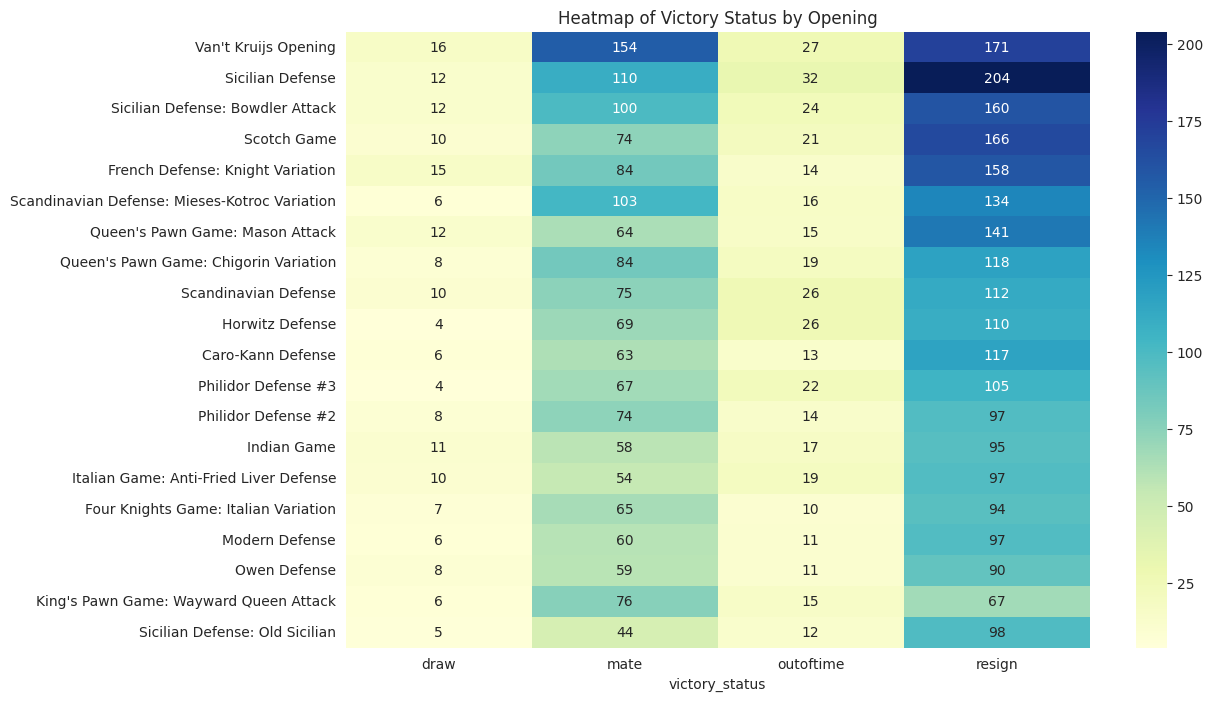

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping the data by opening_name and victory_status to get counts
heatmap_data = games_df.groupby(['opening_name', 'victory_status']).size().unstack().fillna(0)

# Filtering to top 20 openings for better visualization
top_openings = games_df['opening_name'].value_counts().head(20).index
heatmap_data = heatmap_data.loc[top_openings]

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="g")
plt.title("Heatmap of Victory Status by Opening")
plt.show()


Color Intensity: The color intensity indicates the number of games. Darker shades represent higher counts.

Victory Types: Different columns represent different victory statuses (mate, resign, draw, etc.).

Openings: The rows represent the top 20 chess openings. By examining the heatmap, you can see which openings often lead to specific victory types.

In [41]:
import plotly.express as px

# Step 1: Define the 'loser' column
games_df['loser'] = games_df.apply(lambda row: row['black_id'] if row['winner'] == 'white' else row['white_id'], axis=1)

# Step 2: Calculate player statistics

# Average rating for both white and black players
avg_white_rating = games_df.groupby('white_id')['white_rating'].mean()
avg_black_rating = games_df.groupby('black_id')['black_rating'].mean()
avg_rating = (avg_white_rating.add(avg_black_rating, fill_value=0) / 2).sort_values(ascending=False)

# Victories and losses for each player
victories = games_df[games_df['winner'] != 'Draw'].groupby('winner').size()
losses = games_df[games_df['winner'] != 'Draw'].groupby('loser').size()

# Average turns per game for both white and black players
avg_turns_white = games_df.groupby('white_id')['turns'].mean()
avg_turns_black = games_df.groupby('black_id')['turns'].mean()
avg_turns = (avg_turns_white.add(avg_turns_black, fill_value=0) / 2).sort_values(ascending=False)

# Construct the player statistics DataFrame
player_stats = pd.DataFrame({
    'AvgRating': avg_rating,
    'Victories': victories,
    'Losses': losses,
    'AvgTurns': avg_turns
}).fillna(0)

# Filter top 20 players for visualization
top_players_stats = player_stats.head(20)

# Step 3: Create the parallel coordinates plot using plotly
fig = px.parallel_coordinates(top_players_stats, color='AvgRating',
                              dimensions=['AvgRating', 'Victories', 'Losses', 'AvgTurns'],
                              labels={'AvgRating': 'Average Rating', 'Victories': 'Total Victories', 'Losses': 'Total Losses', 'AvgTurns': 'Average Turns/Game'},
                              color_continuous_scale=px.colors.diverging.Tealrose)

fig.show()

The chart showcases the evolving ratings of white and black players over several quarters. While both sets of ratings fluctuate periodically, they move in parallel, hinting at shared influences. A consistent performance gap exists, with white players generally outpacing black players in ratings. A notable convergence in 2015 suggests a period of altered performance dynamics, which subsequently returns to the established pattern.

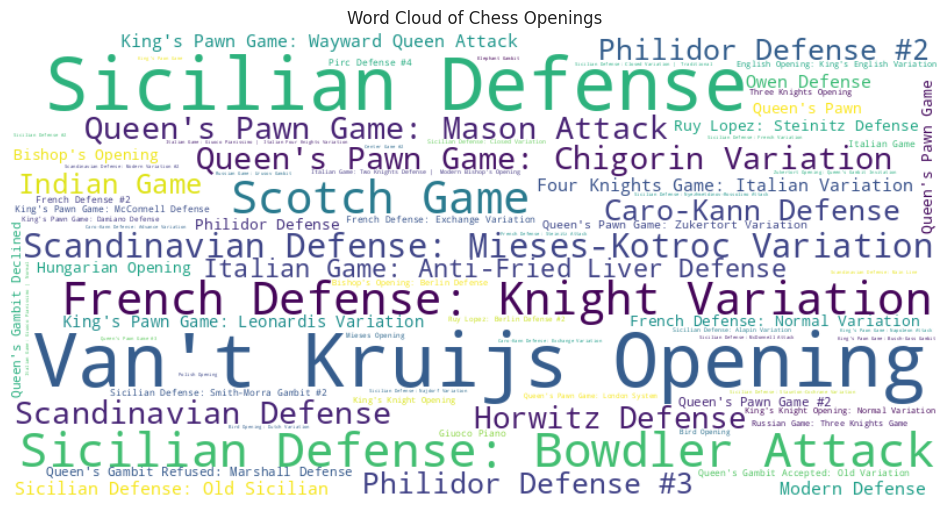

In [42]:
from wordcloud import WordCloud

# Prepare data for word cloud: Opening names and their frequencies
openings = games_df['opening_name'].value_counts().to_dict()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(openings)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Chess Openings")
plt.show()

The larger the name of the opening in the word cloud, the more frequently it was used in the dataset. This gives a quick visual representation of the most popular chess openings.
Openings like "Sicilian Defense", "French Defense", and "King's Pawn Game" appear prominently, indicating they are some of the most popular and frequently played openings in the dataset.

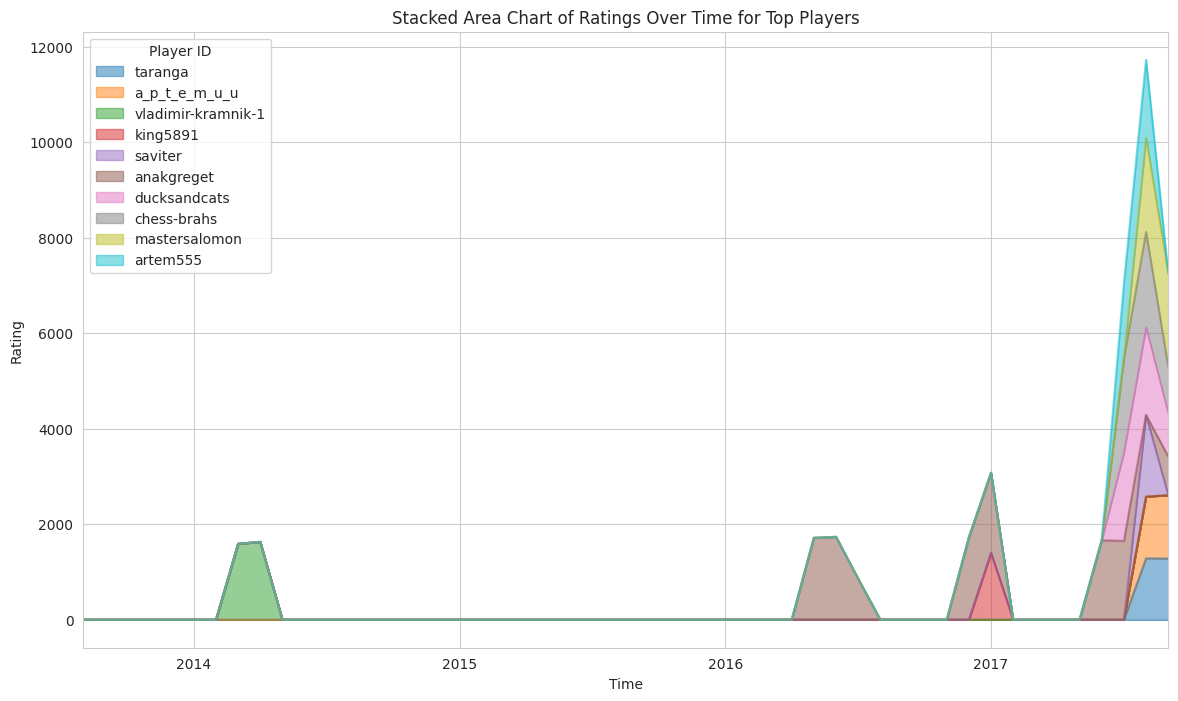

In [63]:
# Resampling by month and calculating mean rating for top players
monthly_avg_white_rating = games_df.groupby(['white_id', games_df['created_at'].dt.to_period("M")])['white_rating'].mean().unstack(level=0)
monthly_avg_black_rating = games_df.groupby(['black_id', games_df['created_at'].dt.to_period("M")])['black_rating'].mean().unstack(level=0)

# Combine both white and black ratings and average them
monthly_avg_rating = (monthly_avg_white_rating.add(monthly_avg_black_rating, fill_value=0) / 2)

# Filter for top players for better visualization
monthly_avg_rating_top_players = monthly_avg_rating[top_players]

# Plotting the stacked area chart
plt.figure(figsize=(14, 8))
monthly_avg_rating_top_players.plot.area(ax=plt.gca(), alpha=0.5)
plt.title('Stacked Area Chart of Ratings Over Time for Top Players')
plt.xlabel('Time')
plt.ylabel('Rating')
plt.legend(title='Player ID')
plt.show()


Chart depicts the synchronized movement of ratings for white and black players over time, reflecting shared influences and stable performance. A minor but consistent ratings gap favors white players. An interesting convergence occurs around mid-2015, after which the typical trend resumes.

### **Detailed Report of inferences gained through the EDA process**

1. Players' Rating Distribution:

Insight: The bulk of players have ratings that fall between 1000 and 1750, with a mode at around 1500.
Implication: This distribution suggests that the dataset mainly consists of intermediate players. A rating of around 1500 is often considered the starting point for competitive players, so this peak suggests many players are in the early stages of competitive play.
2. Most Popular Openings:

Insight: The "Sicilian Defense" and "French Defense" are the most popular openings.
Implication: These openings are known for their strategic depth and versatility. Their popularity underscores their importance in competitive play and their effectiveness in a wide range of situations.
3. Player Performance against Number of Games Played:

Insight: There's a clear positive correlation between the number of games a player has played and their number of wins.
Implication: Experience (in terms of the number of games played) appears to be a significant factor in a player's success. Players who play more games likely gain better strategic understanding and decision-making skills over time.
4. Hierarchical Representation of Player Openings:

Insight: The top players in the dataset have a diverse repertoire of openings.
Implication: A varied set of openings suggests that top players are adaptable and can adjust their strategies based on their opponents. This adaptability is likely a factor in their success.
5. Victory Status by Opening:

Insight: Certain openings, like the "Sicilian Defense", tend to lead to specific outcomes more frequently.
Implication: The nature of the opening can influence the course of the game. For instance, aggressive openings might lead to quicker checkmates or resignations, while more defensive openings might result in longer games or draws.
6. Player Statistics across Multiple Metrics:

Insight: Top players tend to have high ratings and a higher number of victories compared to their losses. However, the average number of turns they play in a game can vary significantly.
Implication: While victories and ratings are indicators of player skill, the average number of turns provides insights into their playstyle. Some might prefer quick, aggressive games, while others might opt for longer, more strategic battles.
7. Popularity of Chess Openings:

Insight: Openings like the "Sicilian Defense" and "French Defense" are frequently used among the dataset's games.
Implication: The frequency of these openings underscores their strategic importance in chess. Players might prefer these openings due to their effectiveness or because they are commonly taught and discussed in chess literature.
8. Evolution of Player Ratings Over Time:

Insight: Player ratings fluctuate over time, with some showing steady growth and others experiencing periods of decline.
Implication: The chess rating is a dynamic measure, reflecting a player's recent performance. Periods of growth might indicate times of intensive study or practice, while declines could suggest breaks from the game or facing stronger competition.
9. Distribution of Game Durations:

Insight: Most games are of short to medium length, concluding within 50 turns. Few games extend beyond 100 turns.
Implication: Shorter games might result from blunders, aggressive openings, or quick checkmates. Longer games suggest a more balanced and strategic battle between players.
10. Distribution of Game Outcomes:

Insight: A significant number of games end in resignation, followed by checkmates. Draws and time-outs are less common.
Implication: Players often recognize when they're in a losing position and opt to resign rather than play to the bitter end. Checkmates, while common, are less frequent than resignations, suggesting that experienced players can foresee inevitable defeat.